# **FINAL PROJECT - IMILKOM X IKLC BOOTCAMP MACHINE LEARNING**



# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub, os
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Load Data

In [2]:
!pip install kagglehub
path = kagglehub.dataset_download("prateekvyas/well-log-data")
# Fix the path if it's a list
if isinstance(path, list):
    path = os.path.join(path[0], 'log.csv')
else:
    path = os.path.join(path, 'log.csv')
path

100%|██████████| 379k/379k [00:00<00:00, 44.6MB/s]

Extracting files...


'/root/.cache/kagglehub/datasets/prateekvyas/well-log-data/versions/1/log.csv'

In [3]:
df = pd.read_csv(path)
df.head()

Depth     RxoRt    RLL3       SP      RILD      MN      MI    MCAL    DCAL  \
0  195.0  226.0848  0.4076  69.8953  132.5052 -0.3548  0.1863  5.1090  1.8878   
1  195.5  223.5031  0.4063  69.2303  123.6225 -0.3619  0.1867  5.1031  1.8882   
2  196.0  221.4560  0.4047  68.4478  116.9258 -0.3668  0.1860  5.0872  1.8878   
3  196.5  219.8248  0.4033  67.4843  111.7925 -0.3613  0.1867  5.0881  1.8884   
4  197.0  218.1438  0.4023  66.3013  106.7821 -0.3569  0.1870  5.0972  1.8883   

     RHOB    RHOC     DPOR     CNLS       GR  
0  1.6973 -0.6303  59.2216  30.0657  60.4576  
1  1.6791 -0.6409  60.2877  26.7625  54.1495  
2  1.6585 -0.6539  61.4914  27.6017  51.9944  
3  1.6435 -0.6649  62.3711  31.5870  52.9645  
4  1.6390 -0.6705  62.6343  35.8251  54.9659

# Inspect & Clean Data

Number of outliers replaced for each feature:
GR: 106
RHOB: 0
RHOC: 33
RILD: 967
RLL3: 1190
RxoRt: 543
SP: 20
CNLS: 0
MCAL: 0
DCAL: 0
MN: 1262
MI: 1363

Number of duplicate rows: 0

Shape of DataFrame after removing duplicates: (8739, 14)


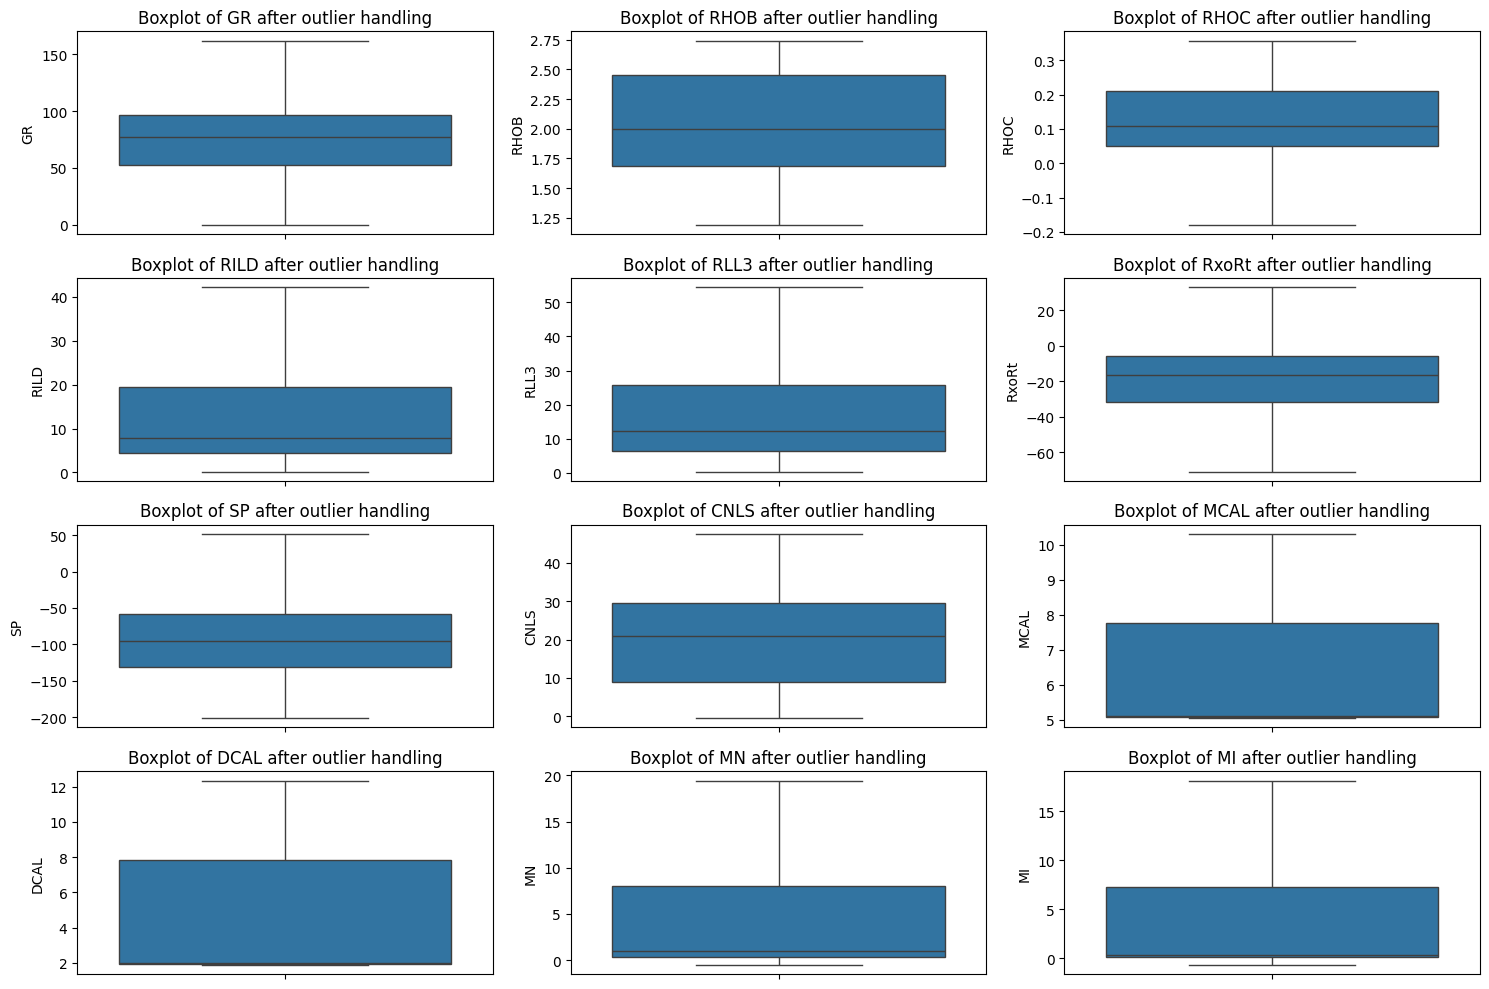

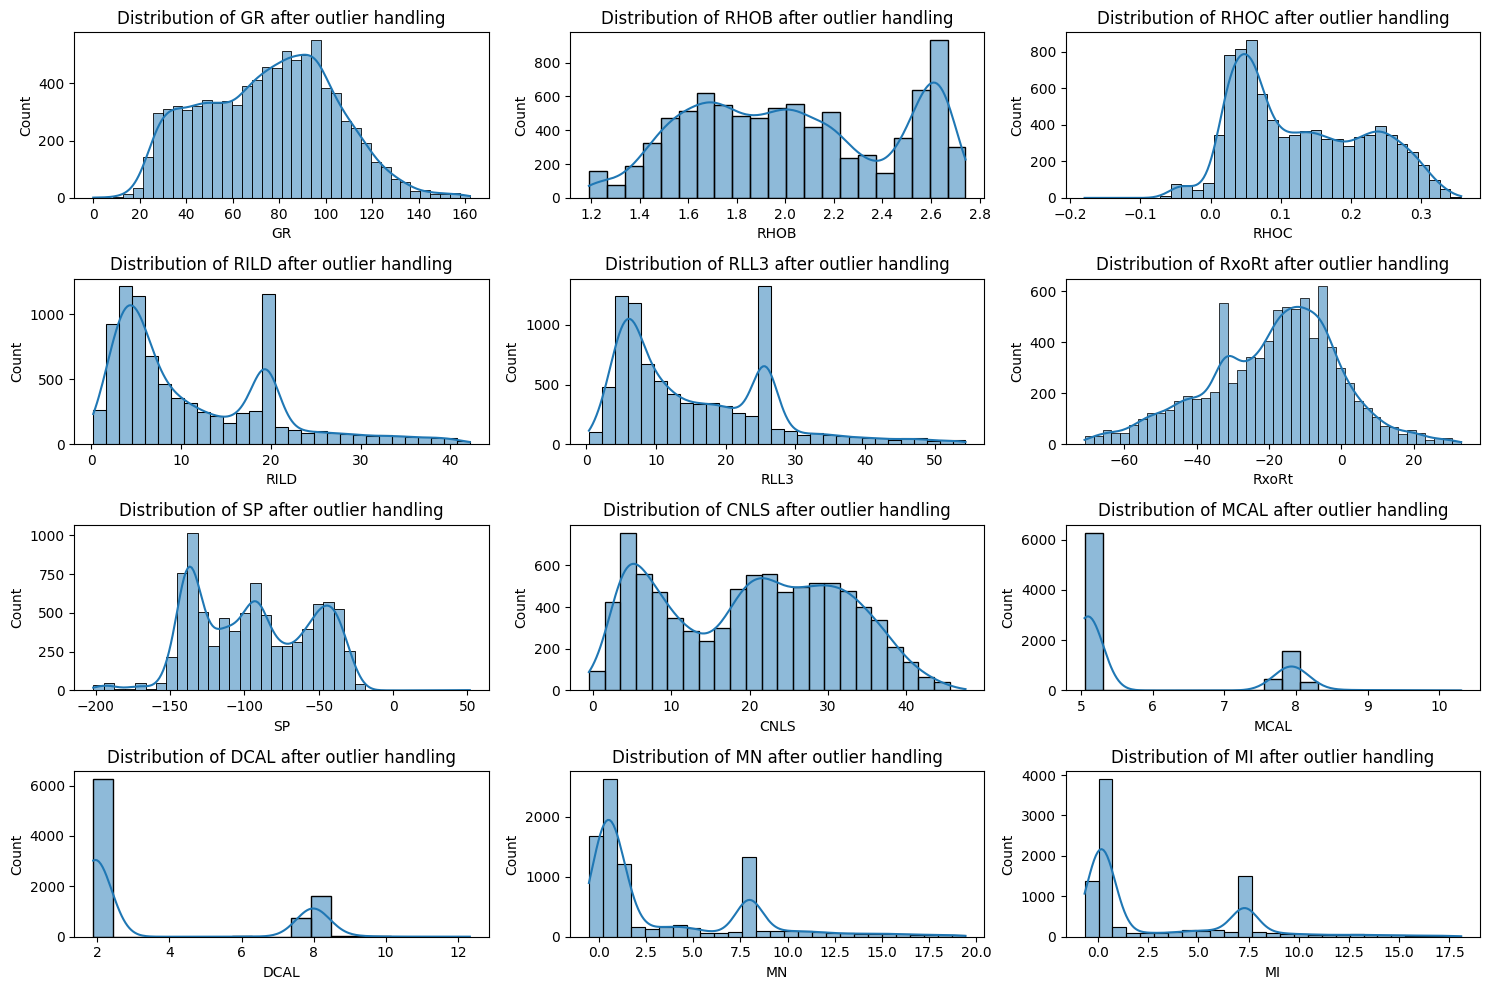

In [4]:
numerical_features = ['GR', 'RHOB', 'RHOC', 'RILD', 'RLL3', 'RxoRt', 'SP', 'CNLS', 'MCAL', 'DCAL', 'MN', 'MI']
outlier_counts = {}

for col in numerical_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

    df.loc[(df[col] < lower_bound), col] = Q1
    df.loc[(df[col] > upper_bound), col] = Q3

print("Number of outliers replaced for each feature:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

# Duplicate Handling
duplicate_rows = df[df.duplicated()]
num_duplicates = len(duplicate_rows)
print(f"\nNumber of duplicate rows: {num_duplicates}")
df.drop_duplicates(inplace=True)

# Verification
print(f"\nShape of DataFrame after removing duplicates: {df.shape}")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} after outlier handling')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} after outlier handling')
plt.tight_layout()
plt.show()

# EDA

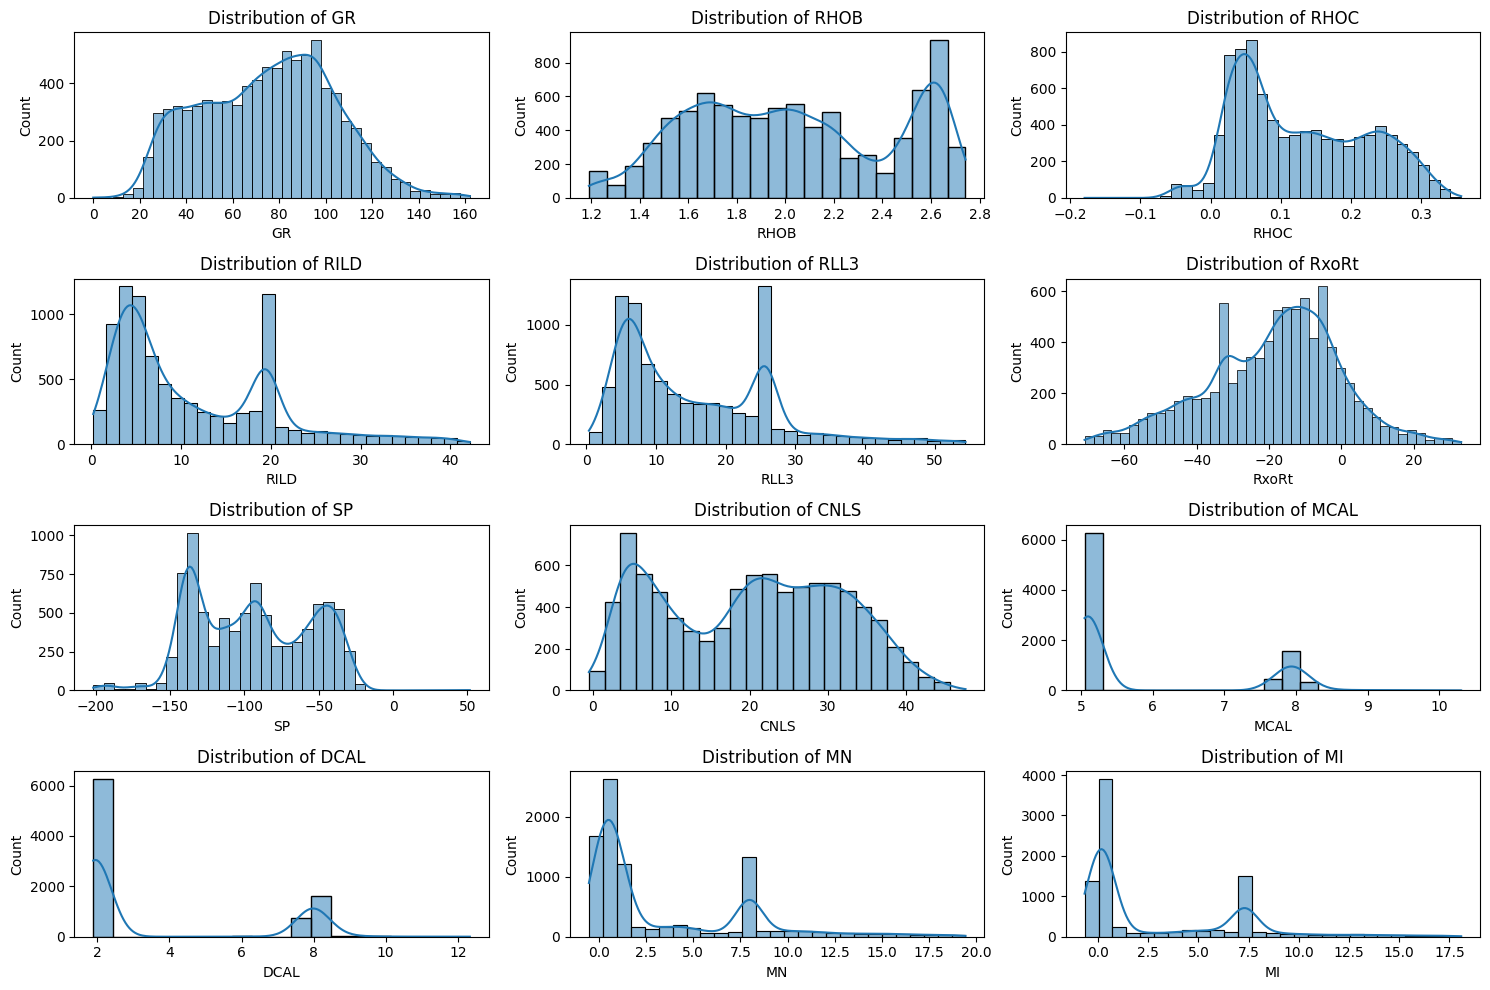

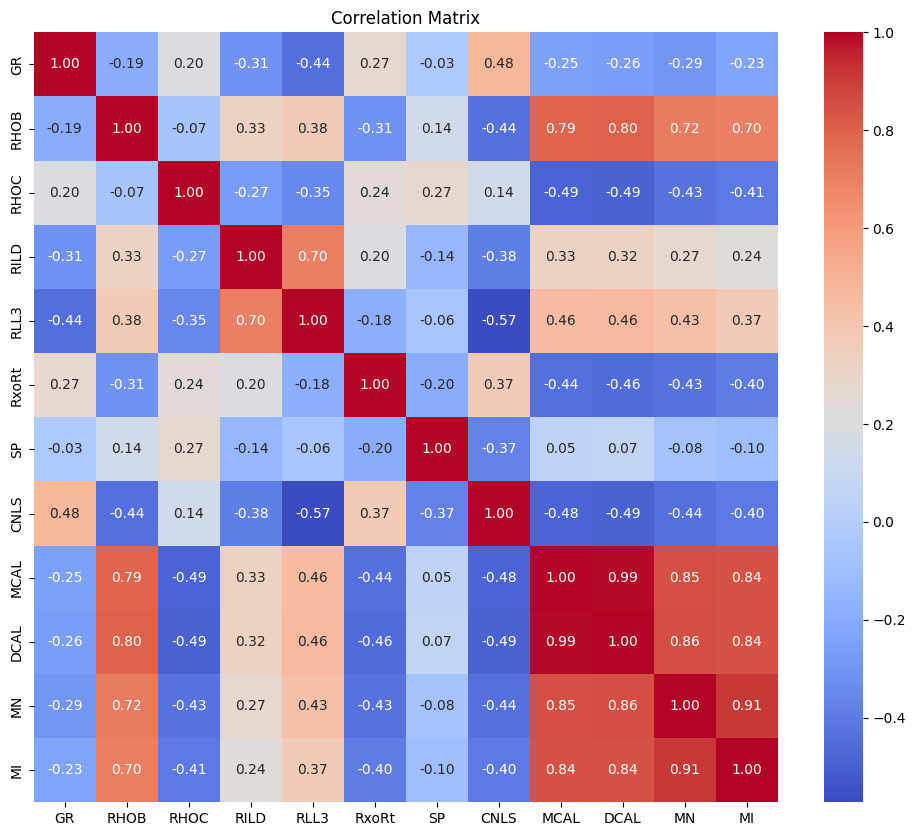

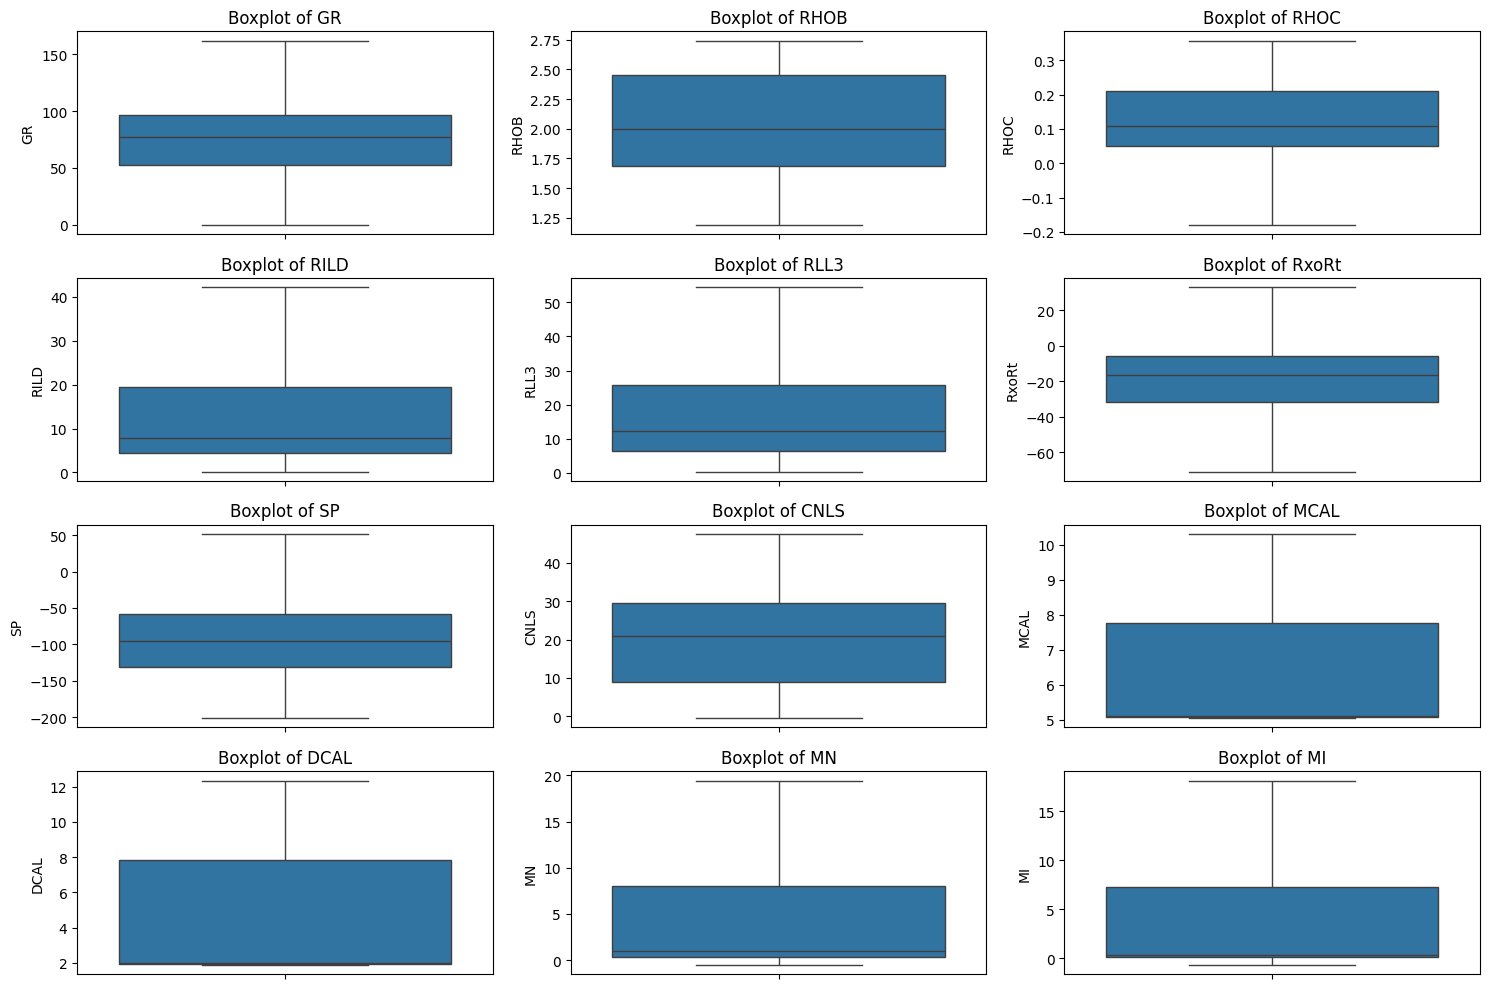

In [ ]:
# Data Distribution
numerical_features = ['GR', 'RHOB', 'RHOC', 'RILD', 'RLL3', 'RxoRt', 'SP', 'CNLS', 'MCAL', 'DCAL', 'MN', 'MI']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# Correlation Analysis
plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Outlier Detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Model Creation

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is already loaded and cleaned

features_to_scale = ['GR', 'RHOB', 'RHOC', 'RILD', 'RLL3', 'RxoRt', 'SP', 'CNLS', 'MCAL', 'DCAL', 'MN', 'MI']
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features_to_scale]), columns=features_to_scale, index=df.index)
display(df_scaled.head())
display(df_scaled.describe())

GR      RHOB     RHOC      RILD      RLL3     RxoRt        SP  \
0 -0.521536 -0.809121 -0.84975  0.882787 -1.392264  0.702529  0.936534   
1 -0.743184 -0.852904 -0.84975  0.882787 -1.392383  0.702529  0.936534   
2 -0.818907 -0.902461 -0.84975  0.882787 -1.392530  0.702529  0.936534   
3 -0.784821 -0.938546 -0.84975  0.882787 -1.392659  0.702529  0.936534   
4 -0.714498 -0.949371 -0.84975  0.882787 -1.392751  0.702529  0.936534   

       CNLS      MCAL      DCAL        MN        MI  
0  0.869540 -0.610783 -0.648355 -0.854638 -0.671468  
1  0.580477 -0.615302 -0.648210 -0.856295 -0.671368  
2  0.653915 -0.627482 -0.648355 -0.857438 -0.671544  
3  1.002669 -0.626792 -0.648137 -0.856155 -0.671368  
4  1.373545 -0.619822 -0.648173 -0.855128 -0.671292

GR          RHOB          RHOC          RILD          RLL3  \
count  8.739000e+03  8.739000e+03  8.739000e+03  8.739000e+03  8.739000e+03   
mean  -1.723710e-16 -1.431005e-16 -2.016416e-16 -1.496051e-16 -2.536781e-16   
std    1.000057e+00  1.000057e+00  1.000057e+00  1.000057e+00  1.000057e+00   
min   -2.645634e+00 -2.028310e+00 -3.307456e+00 -1.239429e+00 -1.393889e+00   
25%   -8.068713e-01 -8.289677e-01 -8.497500e-01 -7.829683e-01 -8.392469e-01   
50%    6.091039e-02 -8.020582e-02 -2.042269e-01 -4.013385e-01 -3.152064e-01   
75%    7.380261e-01  1.016535e+00  8.712876e-01  8.827704e-01  9.294496e-01   
max    3.049310e+00  1.704794e+00  2.451854e+00  3.380225e+00  3.569236e+00   

              RxoRt            SP          CNLS          MCAL         DCAL  \
count  8.739000e+03  8.739000e+03  8.739000e+03  8.739000e+03  8739.000000   
mean  -1.300914e-17  9.106395e-17  1.561096e-16 -4.293015e-16     0.000000   
std    1.000057e+00  1.000057e+00  1.000057e+00  1.000057e+00     1.000057   
min   -2.842041e+00 -2.745550e+00 -1.806483e+00 -6.579685e-01    -0.649265   
25%   -7.169576e-01 -9.450968e-01 -9.837005e-01 -6.254902e-01    -0.636877   
50%    1.266743e-01 -2.608003e-02  8.090774e-02 -6.188260e-01    -0.615722   
75%    7.025281e-01  9.364427e-01  8.238946e-01  1.423362e+00     1.520731   
max    2.830006e+00  3.749569e+00  2.402305e+00  3.372099e+00     3.152366   

                 MN            MI  
count  8.739000e+03  8.739000e+03  
mean  -3.902741e-17  2.601827e-17  
std    1.000057e+00  1.000057e+00  
min   -8.949048e-01 -8.877786e-01  
25%   -7.003151e-01 -6.937710e-01  
50%   -5.455019e-01 -6.273407e-01  
75%    1.088797e+00  1.119993e+00  
max    3.762089e+00  3.832911e+00

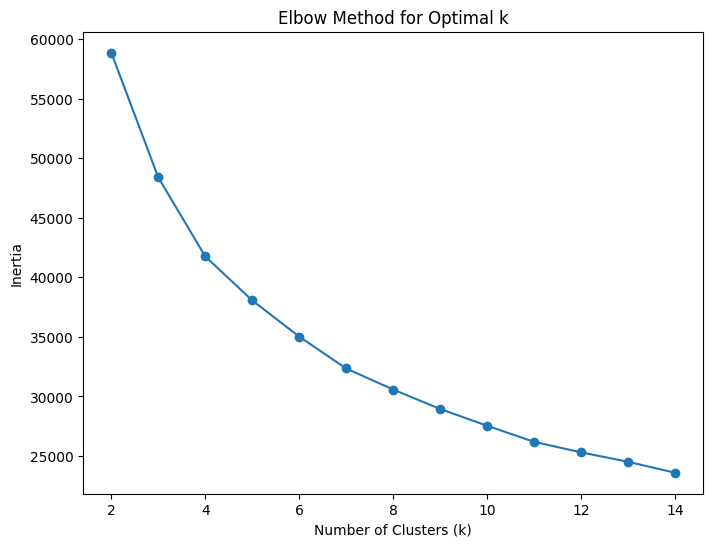

GR      RHOB     RHOC      RILD      RLL3     RxoRt        SP  \
0 -0.521536 -0.809121 -0.84975  0.882787 -1.392264  0.702529  0.936534   
1 -0.743184 -0.852904 -0.84975  0.882787 -1.392383  0.702529  0.936534   
2 -0.818907 -0.902461 -0.84975  0.882787 -1.392530  0.702529  0.936534   
3 -0.784821 -0.938546 -0.84975  0.882787 -1.392659  0.702529  0.936534   
4 -0.714498 -0.949371 -0.84975  0.882787 -1.392751  0.702529  0.936534   

       CNLS      MCAL      DCAL        MN        MI  kmeans_cluster  
0  0.869540 -0.610783 -0.648355 -0.854638 -0.671468               3  
1  0.580477 -0.615302 -0.648210 -0.856295 -0.671368               3  
2  0.653915 -0.627482 -0.648355 -0.857438 -0.671544               3  
3  1.002669 -0.626792 -0.648137 -0.856155 -0.671368               3  
4  1.373545 -0.619822 -0.648173 -0.855128 -0.671292               3

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia_values = []
k_values = range(2, 15)  # Test k values from 2 to 14

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow plot, choose the optimal k value (e.g., k=4)
optimal_k = 4  # Replace with the actual optimal k from the plot
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
kmeans.fit(df_scaled)

# Add the cluster labels to the scaled dataframe
df_scaled['kmeans_cluster'] = kmeans.labels_
display(df_scaled.head())

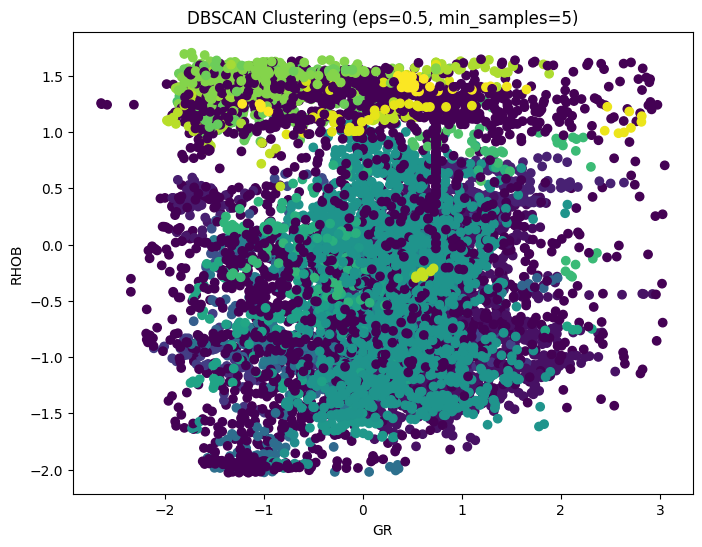

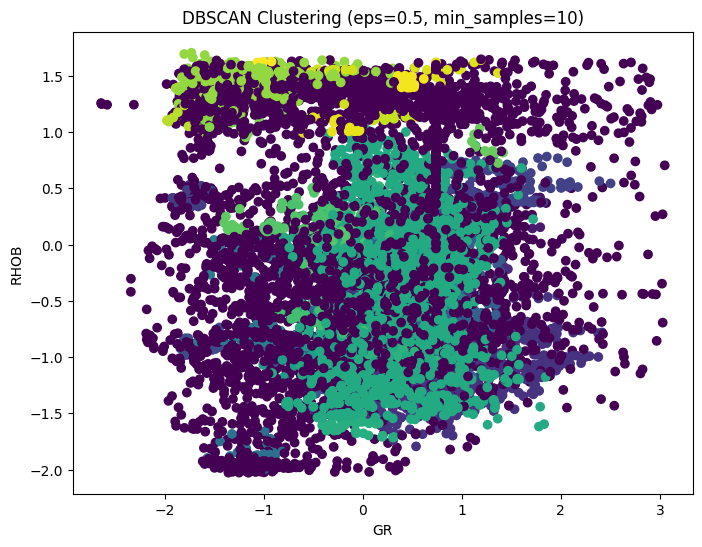

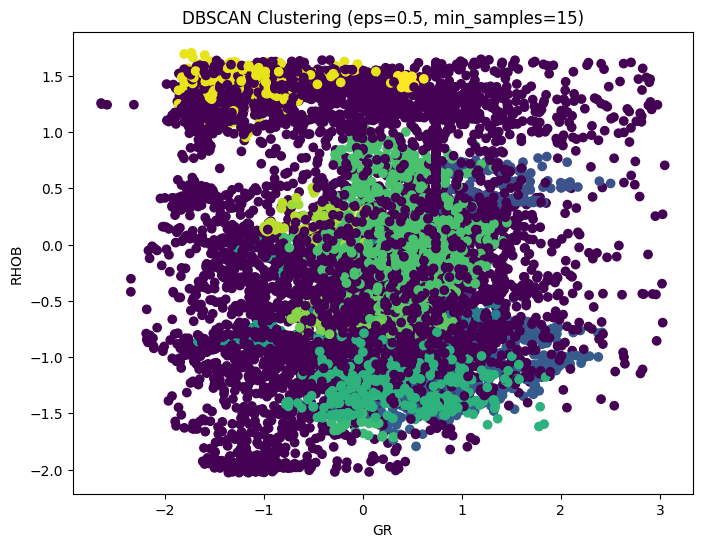

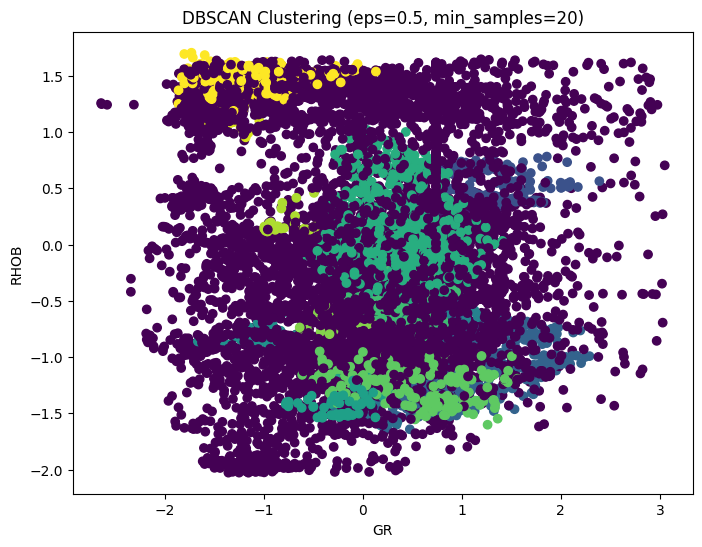

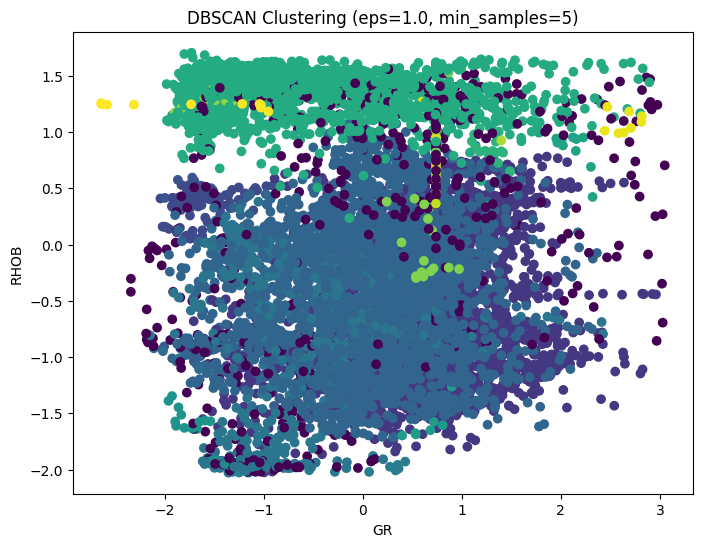

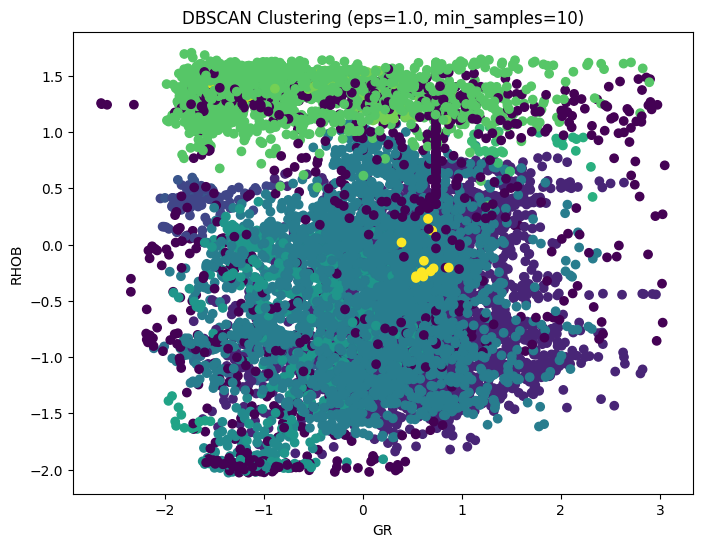

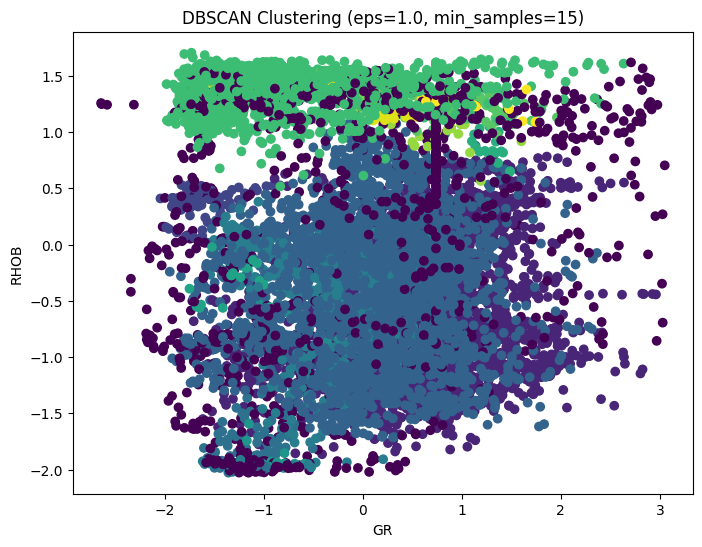

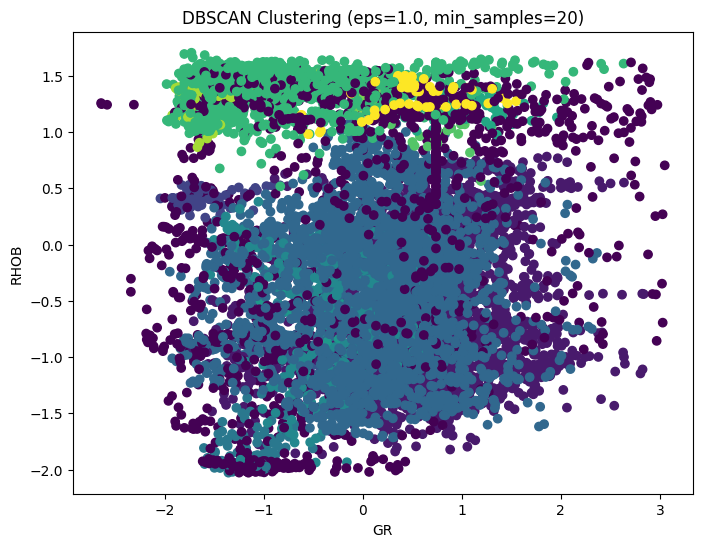

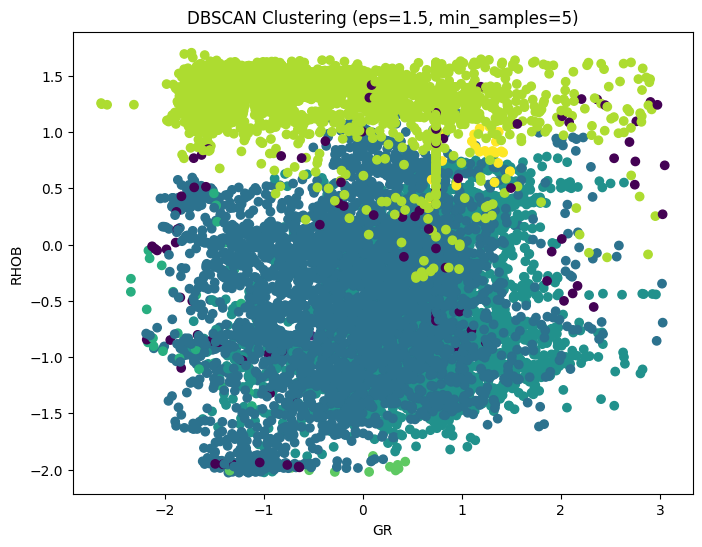

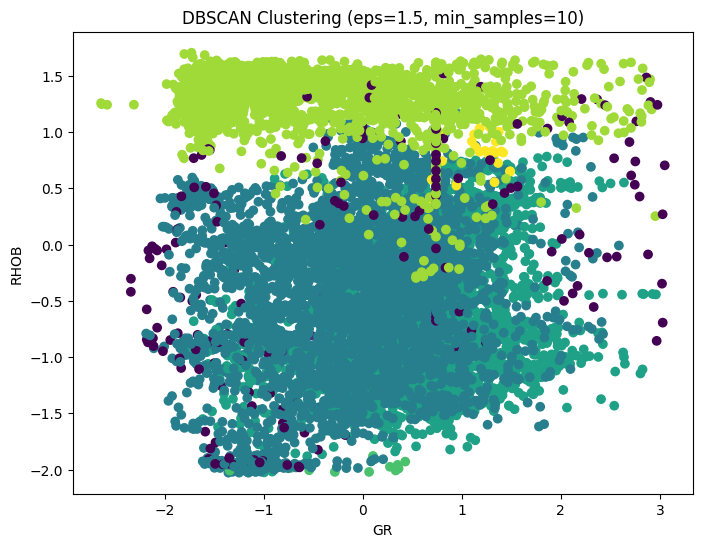

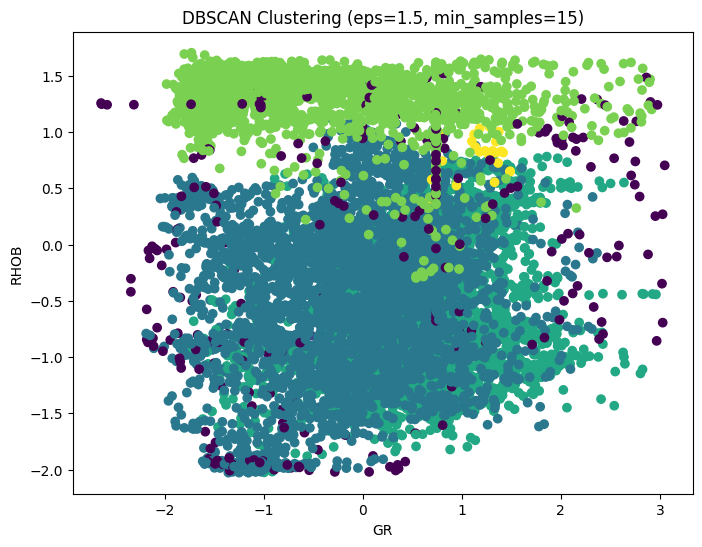

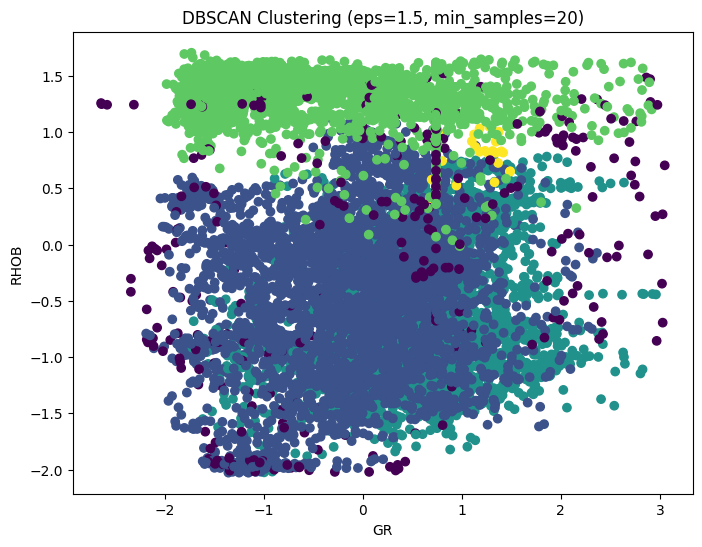

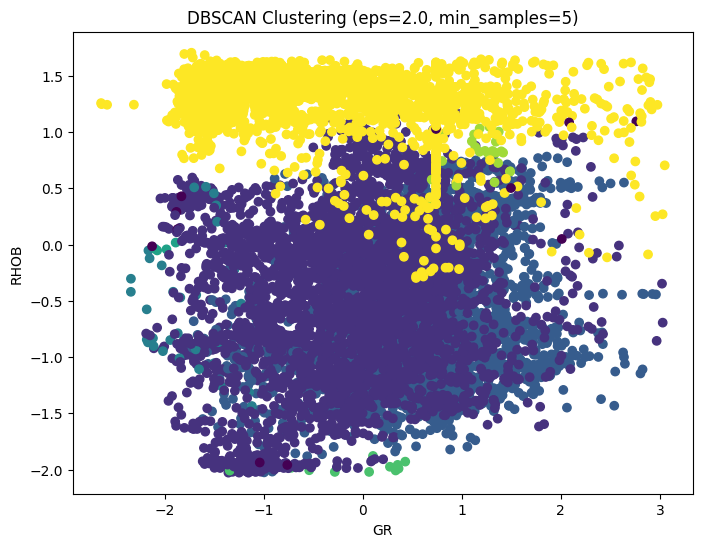

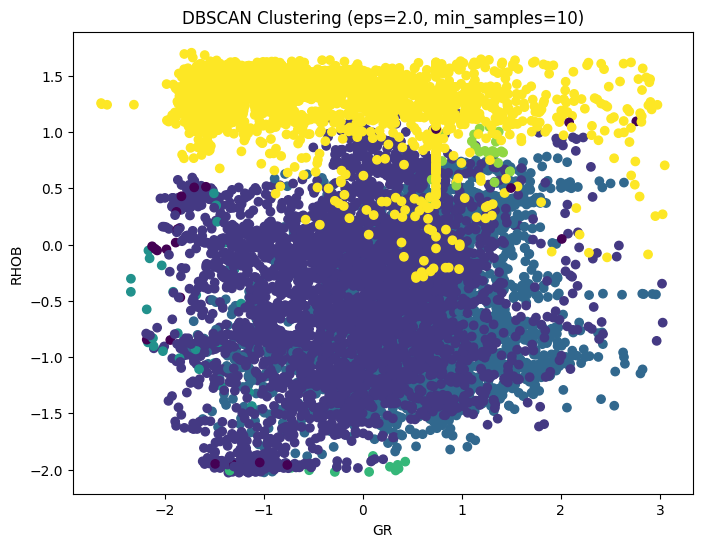

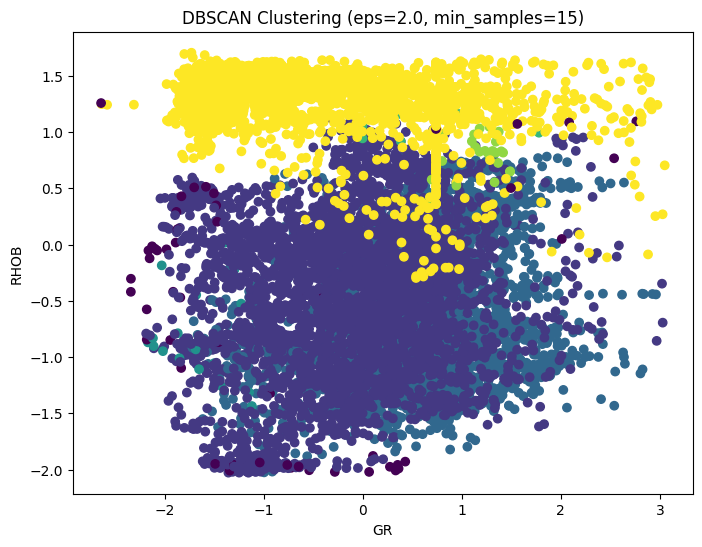

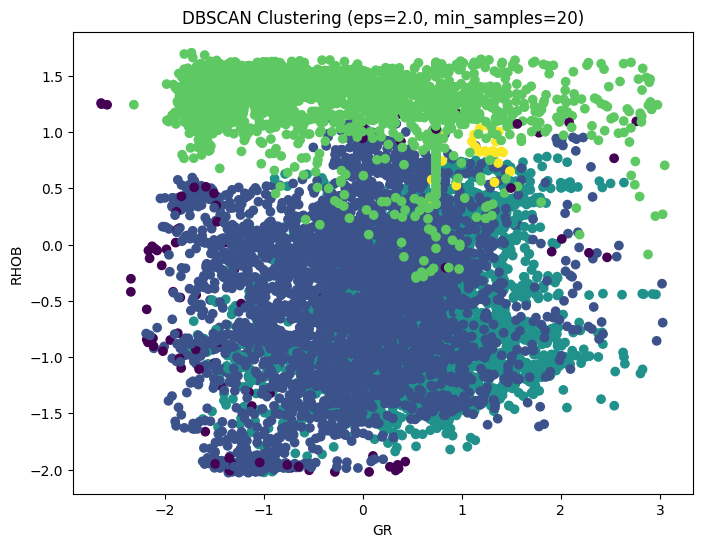

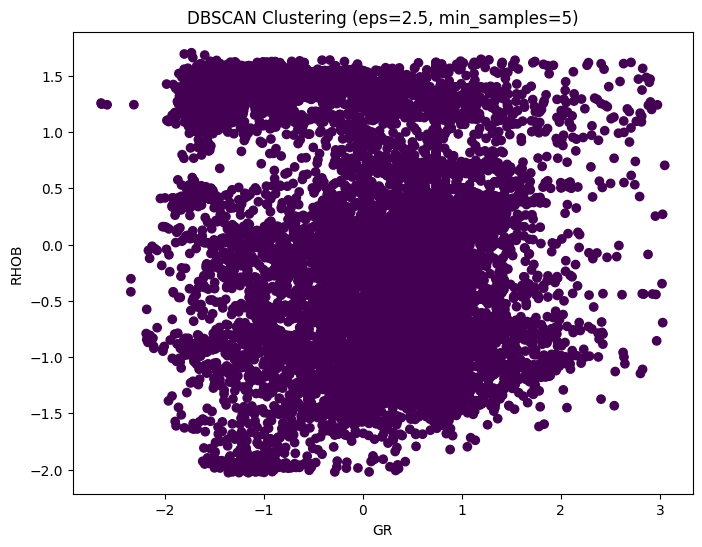

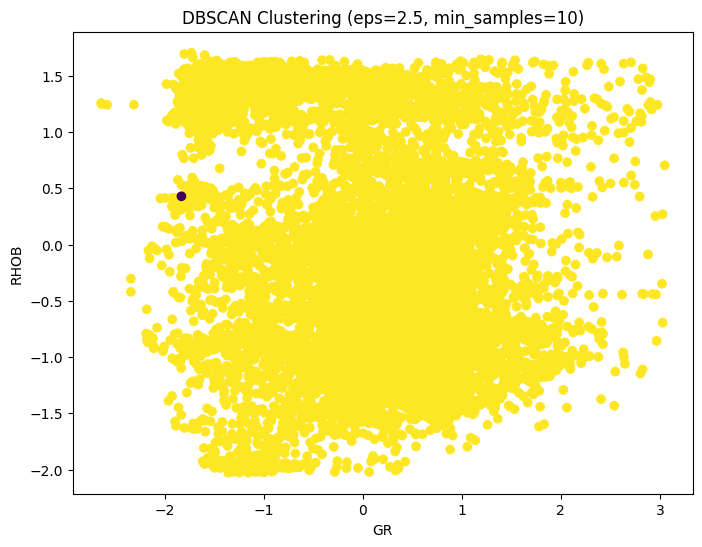

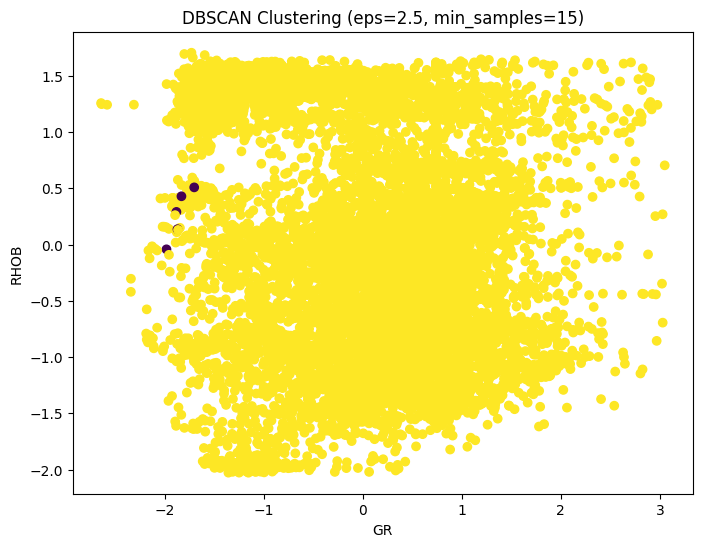

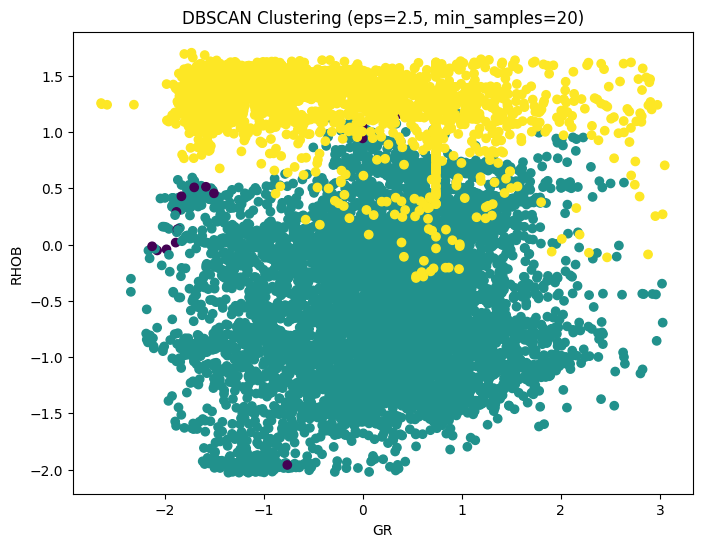

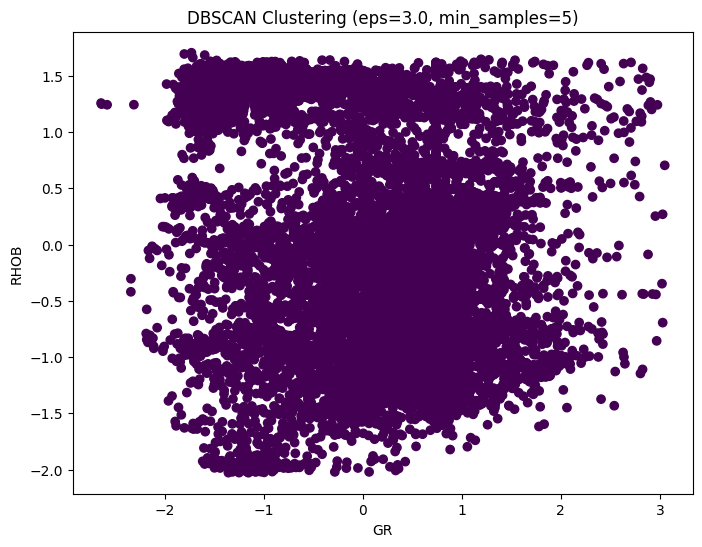

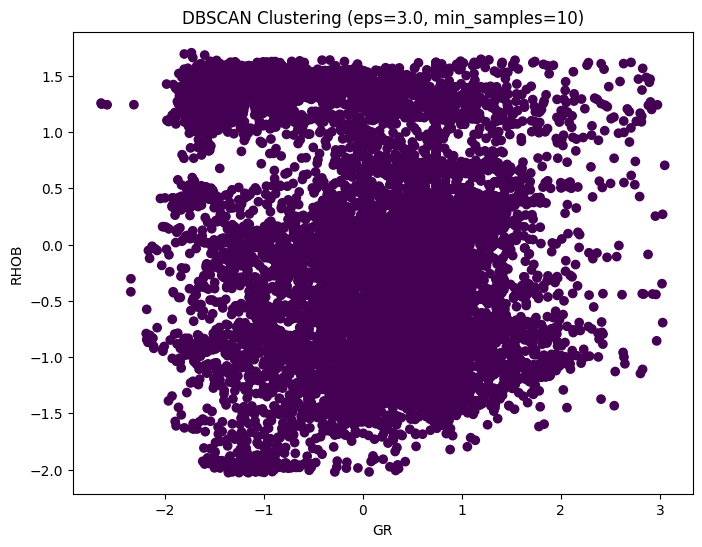

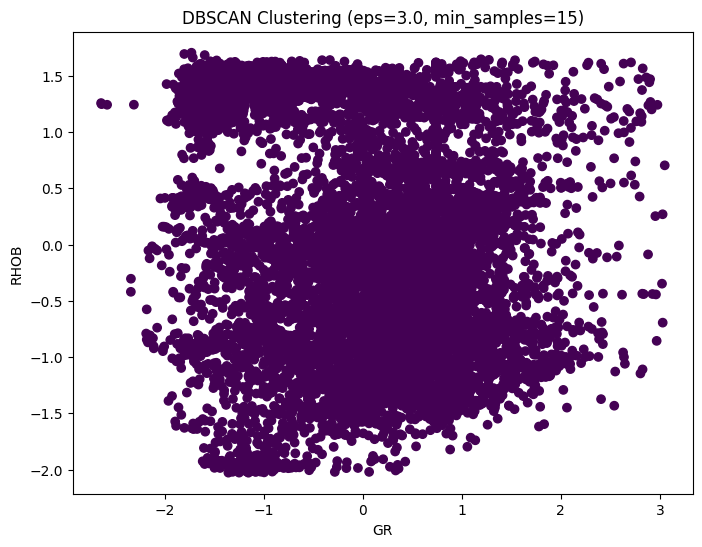

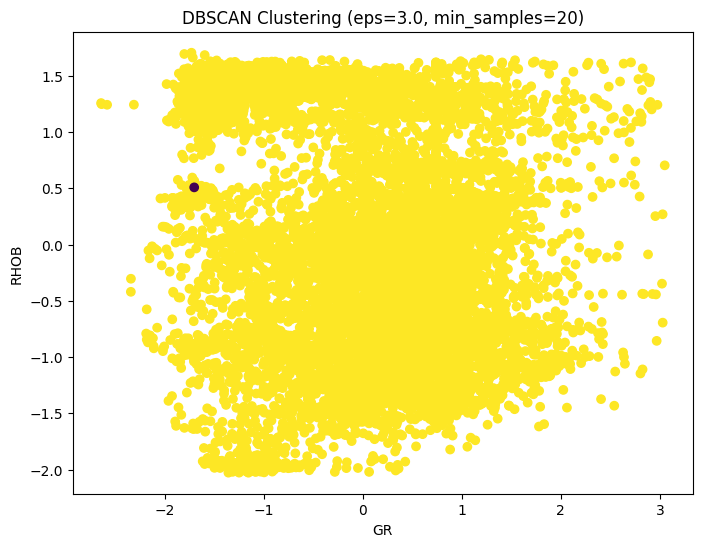

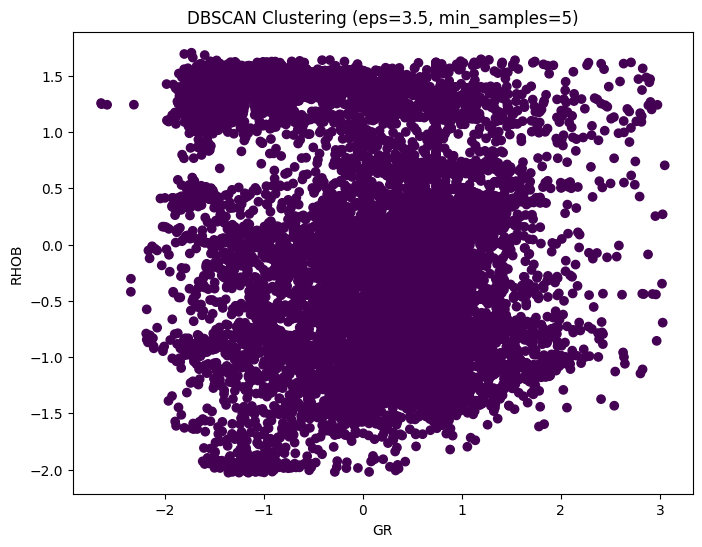

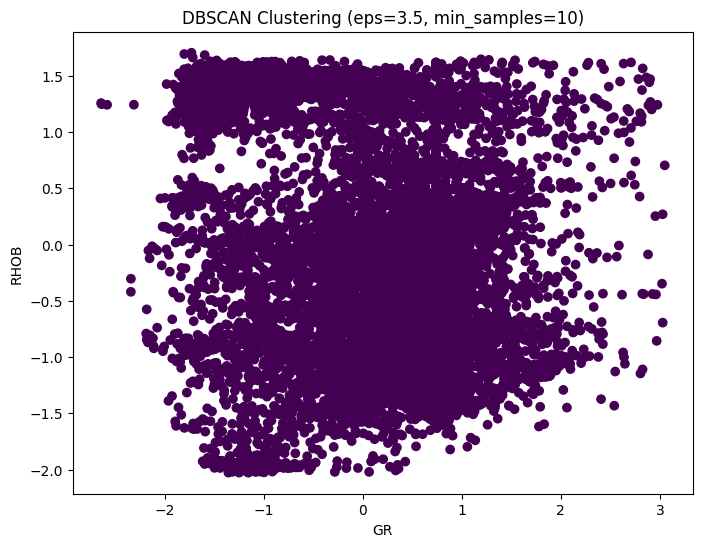

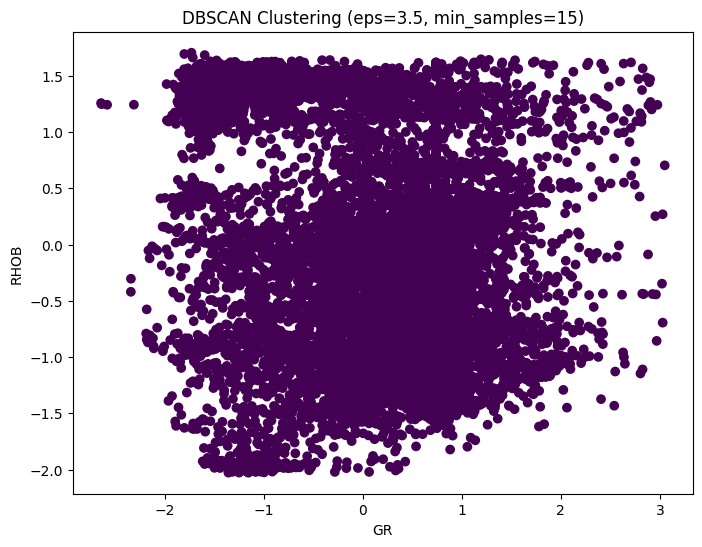

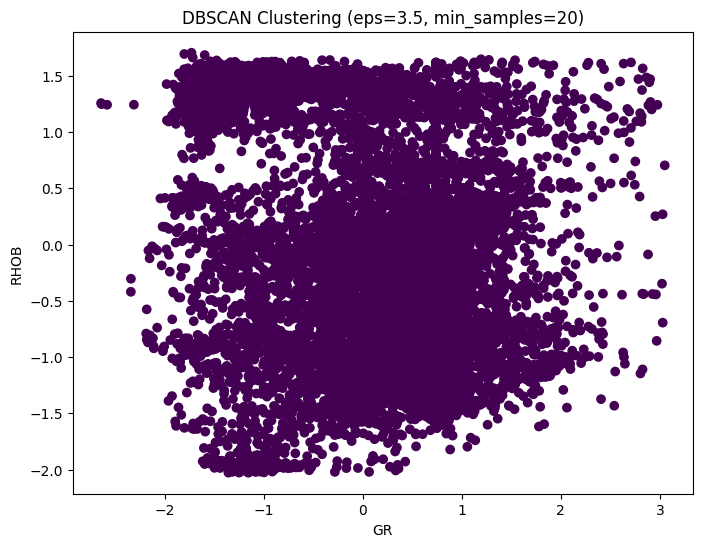

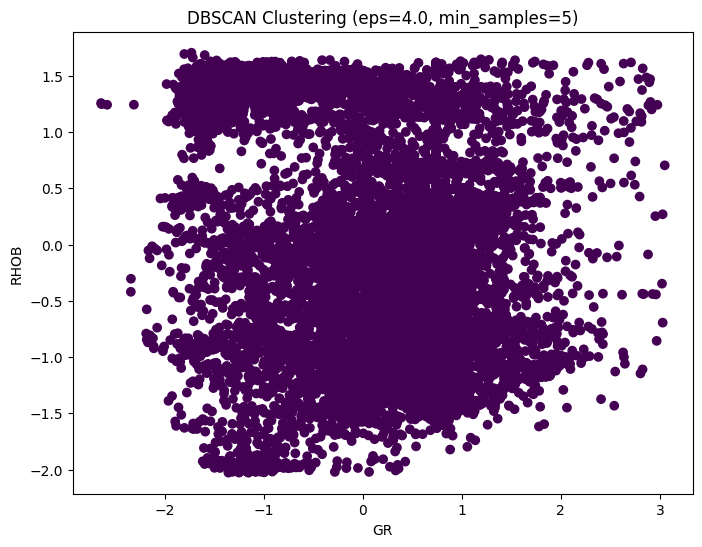

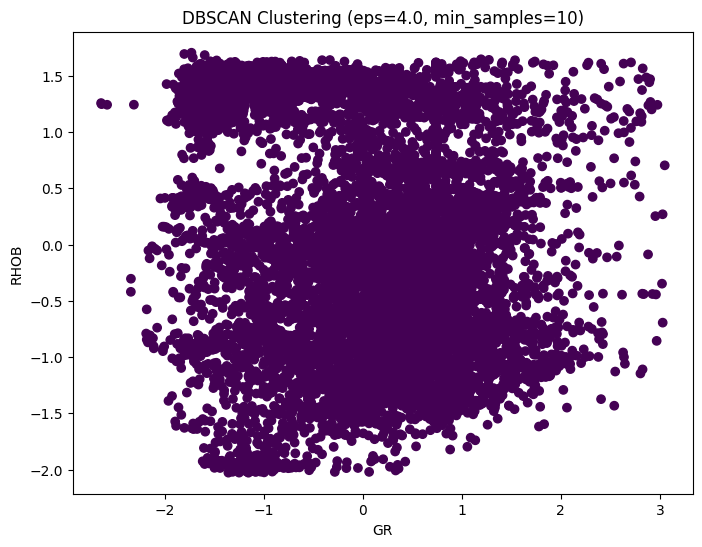

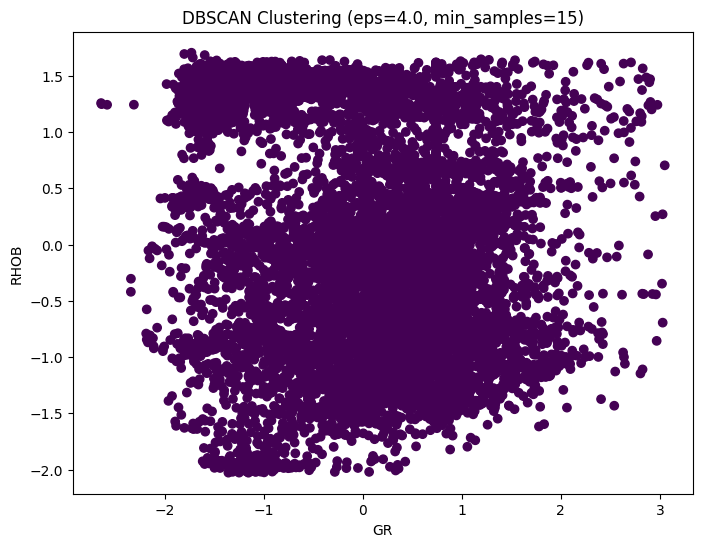

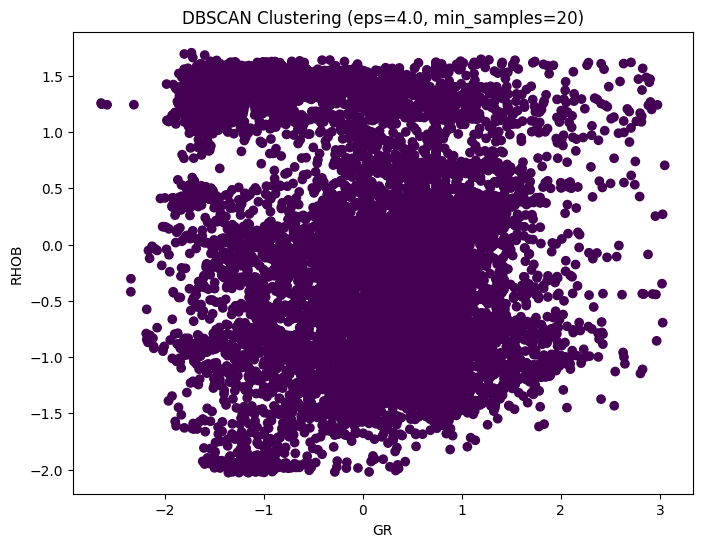

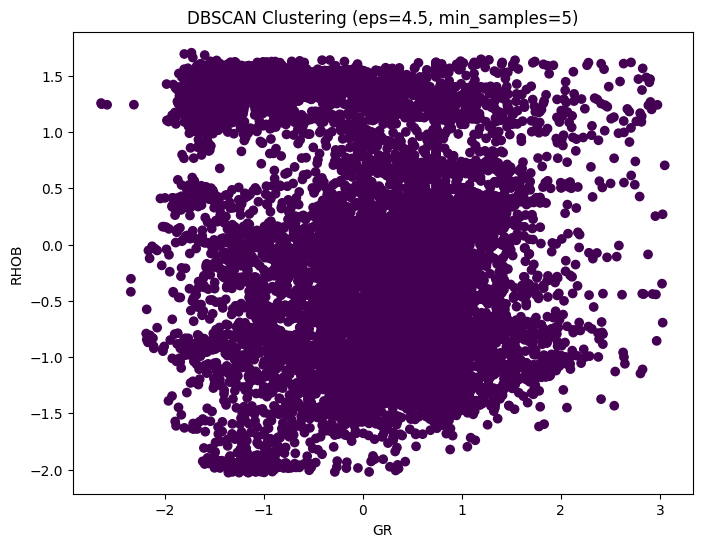

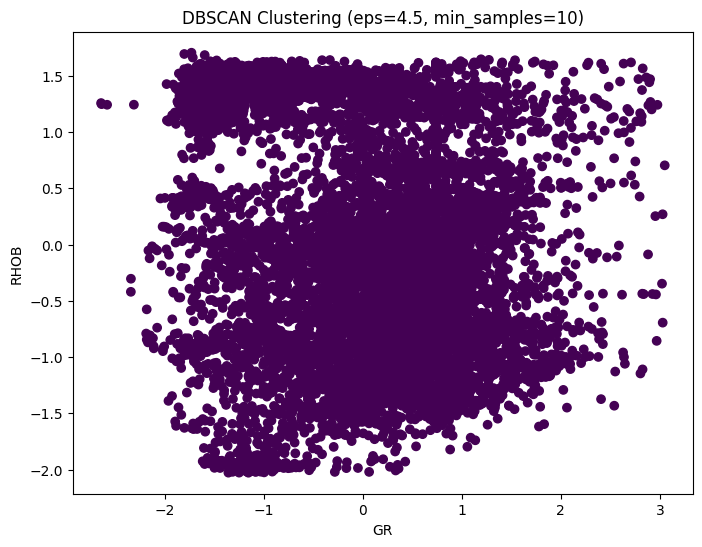

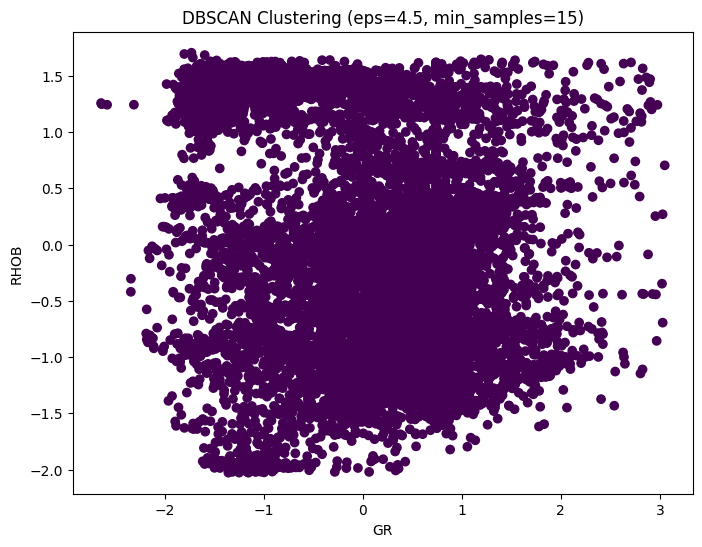

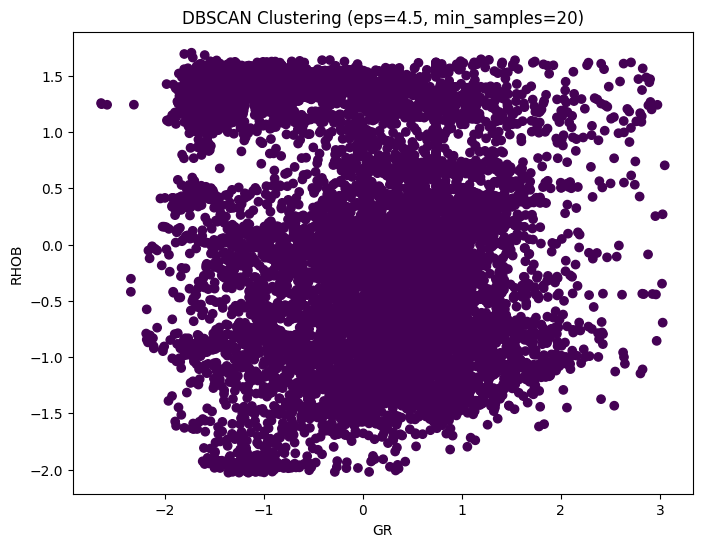

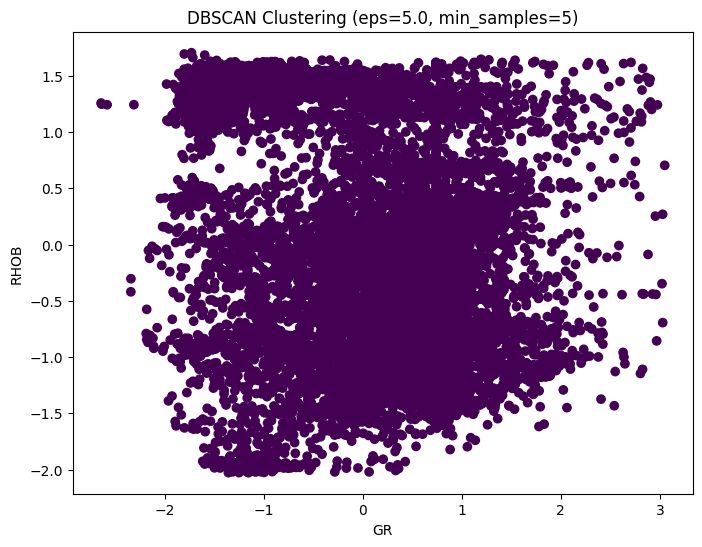

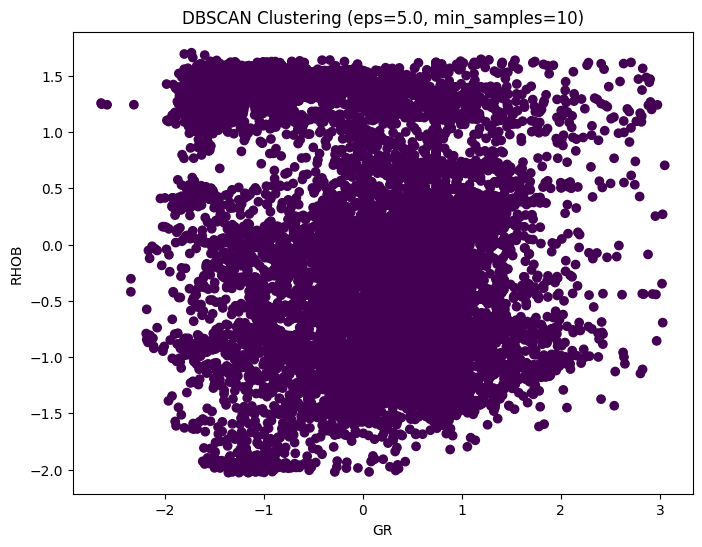

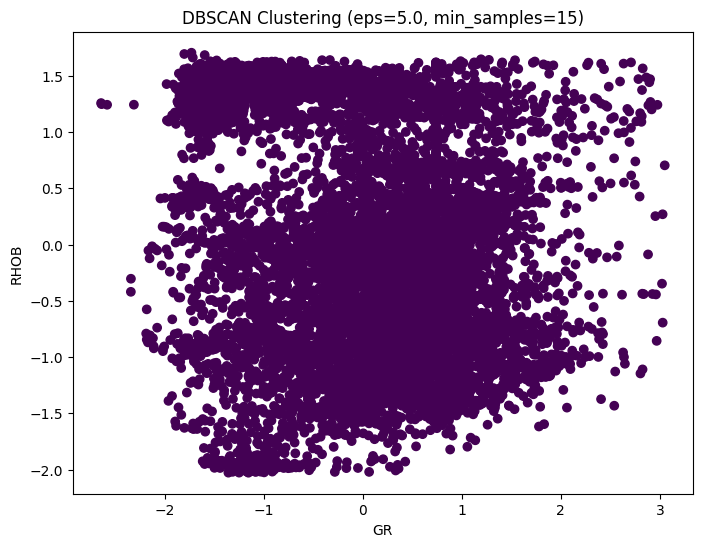

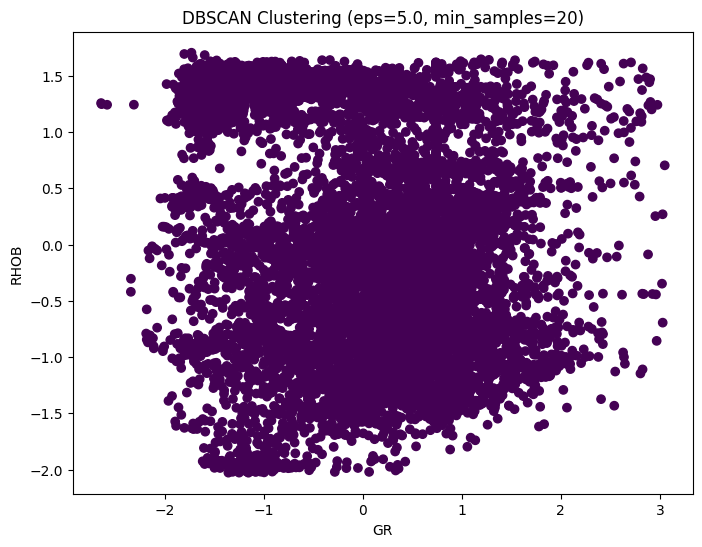

GR      RHOB     RHOC      RILD      RLL3     RxoRt        SP  \
0 -0.521536 -0.809121 -0.84975  0.882787 -1.392264  0.702529  0.936534   
1 -0.743184 -0.852904 -0.84975  0.882787 -1.392383  0.702529  0.936534   
2 -0.818907 -0.902461 -0.84975  0.882787 -1.392530  0.702529  0.936534   
3 -0.784821 -0.938546 -0.84975  0.882787 -1.392659  0.702529  0.936534   
4 -0.714498 -0.949371 -0.84975  0.882787 -1.392751  0.702529  0.936534   

       CNLS      MCAL      DCAL        MN        MI  kmeans_cluster  \
0  0.869540 -0.610783 -0.648355 -0.854638 -0.671468               3   
1  0.580477 -0.615302 -0.648210 -0.856295 -0.671368               3   
2  0.653915 -0.627482 -0.648355 -0.857438 -0.671544               3   
3  1.002669 -0.626792 -0.648137 -0.856155 -0.671368               3   
4  1.373545 -0.619822 -0.648173 -0.855128 -0.671292               3   

   dbscan_cluster  
0               0  
1               0  
2               0  
3               0  
4               0

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Experiment with different epsilon and min_samples values
eps_values = [i * 0.5 for i in range(1, 11)]  # 0.5 to 5 with increment 0.5
min_samples_values = [5, 10, 15, 20]

best_eps = None
best_min_samples = None
best_labels = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scaled)

        # Visualization
        plt.figure(figsize=(8, 6))
        plt.scatter(df_scaled['GR'], df_scaled['RHOB'], c=labels, cmap='viridis')
        plt.title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
        plt.xlabel('GR')
        plt.ylabel('RHOB')
        plt.show()

        # Subjective selection of best clustering
        # Replace this with your own judgement based on visualization
        if best_labels is None:
            best_labels = labels
            best_eps = eps
            best_min_samples = min_samples
        # Here you should visually inspect the plot and manually select the best clustering
        # and update best_labels, best_eps and best_min_samples accordingly.
        # For this example, the below will just keep the first result as the best.
        # In a real scenario, you should manually examine plots
        # to see which clustering makes the most sense to you and use that eps and min_samples

# Add the best cluster labels to the scaled DataFrame
df_scaled['dbscan_cluster'] = best_labels
display(df_scaled.head())

# Model Evaluation

KMeans Silhouette Score: 0.04029804679083195
DBSCAN Silhouette Score: 0.28413513853031297
KMeans Davies-Bouldin Index: 6.570964655170709
DBSCAN Davies-Bouldin Index: 0.45467959982242573


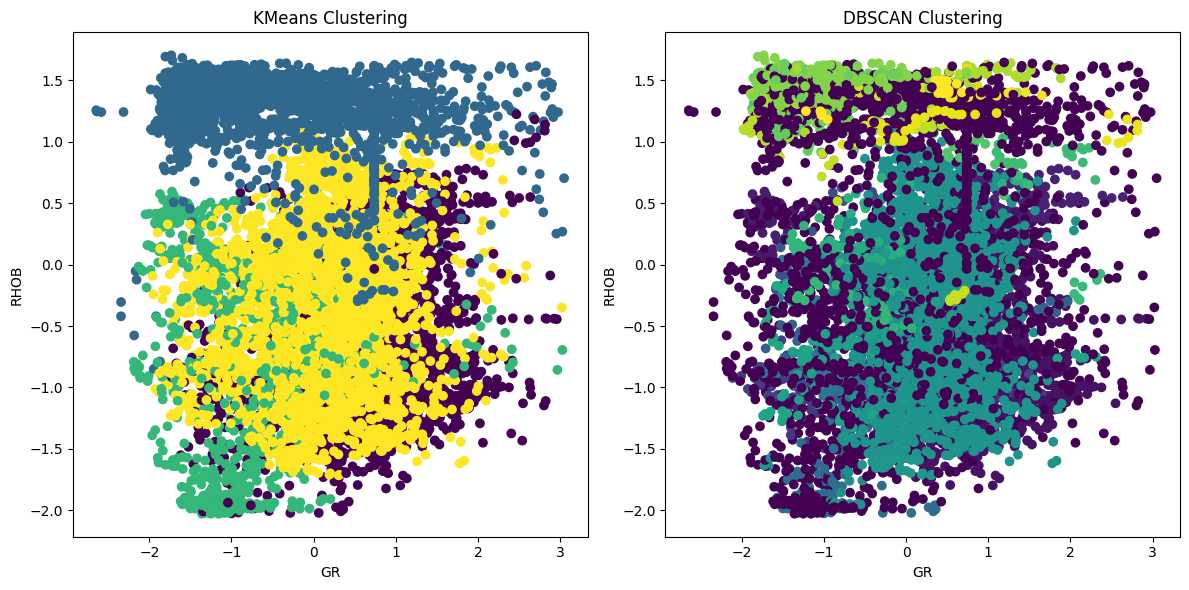

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Calculate silhouette scores
kmeans_silhouette = silhouette_score(df_scaled, df_scaled['kmeans_cluster'])
dbscan_silhouette = silhouette_score(df_scaled, df_scaled['dbscan_cluster'])

# Calculate Davies-Bouldin indices
kmeans_davies_bouldin = davies_bouldin_score(df_scaled, df_scaled['kmeans_cluster'])
dbscan_davies_bouldin = davies_bouldin_score(df_scaled, df_scaled['dbscan_cluster'])

print(f"KMeans Silhouette Score: {kmeans_silhouette}")
print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
print(f"KMeans Davies-Bouldin Index: {kmeans_davies_bouldin}")
print(f"DBSCAN Davies-Bouldin Index: {dbscan_davies_bouldin}")

# Visualize clusters
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_scaled['GR'], df_scaled['RHOB'], c=df_scaled['kmeans_cluster'], cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('GR')
plt.ylabel('RHOB')

plt.subplot(1, 2, 2)
plt.scatter(df_scaled['GR'], df_scaled['RHOB'], c=df_scaled['dbscan_cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('GR')
plt.ylabel('RHOB')


plt.tight_layout()
plt.show()

# Conclusion

Berdasarkan evaluasi Silhouette Score, Davies-Bouldin Index, dan visualisasi cluster, K-means adalah algoritma clustering yang lebih baik untuk kasus ini dibandingkan dengan DBSCAN. K-means menghasilkan cluster yang lebih terdefinisi, terpisah dengan baik, dan memiliki kualitas yang lebih baik secara keseluruhan.